<a href="https://colab.research.google.com/github/khangsheng1/Learning-PyTorch/blob/main/LearnPyTorch_IO/03_PyTorch_Computer_Vision_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1 What are 3 areas in industry where computer vision is currently being used?

1. Smartphones
2. Modern cars
3. Security cameras

# 2 Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns the training data too well, capturing noise and specific patterns that don't generalize to new, unseen data.

# 3 Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Cross-Validation**: This method divides the data into several folds and trains the model on different combinations of these folds. Averaging performance across these folds improves model generalization, reducing overfitting.
2. **Early Stopping**: Early stopping monitors performance on a validation set during training and stops once improvement plateaus, preventing the model from learning noise in the data.
3. **Regularization**: Adding a penalty for complex model parameters (e.g., L1 or L2 regularization) discourages overfitting by limiting the impact of any one feature, leading to a simpler model with better generalization.

# 4 Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

# 5 Load the `torchvision.datasets.MNIST()` train and test datasets.

In [3]:
# Setup training data
train_data_MNIST = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data_MNIST = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

# 6 Visualize at least 5 different samples of the MNIST training dataset.

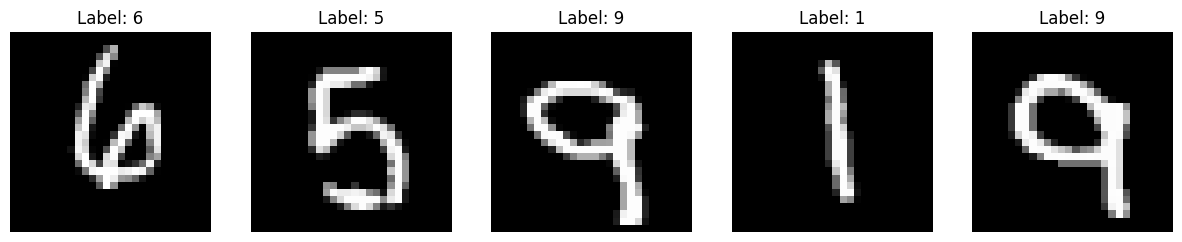

In [4]:
import matplotlib.pyplot as plt
import random

# Set the number of samples
num_samples = 5

# Generate 5 random indices
random_indices = random.sample(range(len(train_data_MNIST)), num_samples)

# Set up the plot for 5 images in a row
plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    image, label = train_data_MNIST[idx]
    plt.subplot(1, num_samples, i+1)
    plt.imshow(image.squeeze(), cmap="gray") # Squeeze the image and display in grayscale
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.show()

In [5]:
class_names = train_data_MNIST.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 7 Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [6]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader_MNIST = DataLoader(train_data_MNIST, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True #shuffle data every epoch?
                              )

test_dataloader_MNIST = DataLoader(test_data_MNIST,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

# Let's check out what we've created
print(f'DataLoader: {train_dataloader_MNIST, test_dataloader_MNIST}')
print(f'Length of train dataloader: {len(train_dataloader_MNIST)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader_MNIST)} batches of {BATCH_SIZE}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7b391a86fa90>, <torch.utils.data.dataloader.DataLoader object at 0x7b391a86fb20>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# 8 Recreate `model_2` used in this notebook (the same model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Create a convolutional neural network
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2_MNIST = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2_MNIST

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)